# Regresión Lineal

La regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras. Puede ayudar a comprender y predecir el comportamiento de sistemas complejos o a analizar datos experimentales, financieros y biológicos.

Las técnicas de regresión lineal permiten crear un modelo lineal. Este modelo describe la relación entre una variable dependiente  y  (también conocida como la respuesta) como una función de una o varias variables independientes  Xi  (denominadas predictores). La ecuación general correspondiente a un modelo de regresión lineal es

$y = \beta_{0} + \sum ()\beta_{i}X_{i} + \epsilon_{i})$



Probablemente estés familiarizado con la forma más simple de un modelo de regresión lineal: ajustar una línea recta a un conjunto de puntos. 

A continuación, realizaremos algunos ejemplo de regresión línea, empezando por el modelo más sencillo la regresión lineal simple que mencionamos antes. Pero, primero, importamos las librerías que vamos a usar.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Regresión linear simple

La regresión lineal simple, como mencionamos antes, consiste en un ajuste en línea recta a los datos usando la forma:
$$
y = ax + b
$$
Detalle:
 - $ a $ se conoce comúnmente como **pendiente**.
 - $ b $ se conoce comúnmente como **intersección**.

Considera los siguientes datos que están dispersos alrededor de una línea con una pendiente de 3 y una intersección de -10:

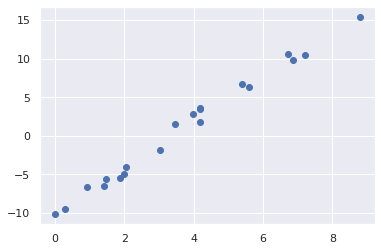

In [2]:
rng = np.random.RandomState(1)
n = 20
x = 10 * rng.rand(n)
y = (3 * x) - 10 + rng.randn(n)
plt.scatter(x, y);

Podemos usar el estimador de **regresión lineal** de `scikit-learn` para ajustar estos datos y construir la línea de mejor ajuste. `scikit-learn` librería gratuitas para Python que cuenta con algoritmos de clasificación, regresión, clustering, entre otros.

Antes explicaremos algunas funciones de apoyo que utilizaremos durante el ejemplo.

In [3]:
x.shape

(20,)

In [5]:
x_new = x[:, np.newaxis]
x_new.shape

(20, 1)

`np.linspace ( start, end , pts)` nos permite generar valores a intervalos regulares dentro de un rango. `star` es el valor de inicio, `end` es el valor fin y `pts` son los puntos (o valores) que se generan entre el inicio y el final.

In [6]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

La función `np.vstack` nos permite apilar matrices en secuencia vertical.

In [8]:
np.vstack([x,x])

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00],
       [4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00]])

Bueno, ahora emplearemos `scikit-learn` para generar nuestro modelo de regresión lineal simple.

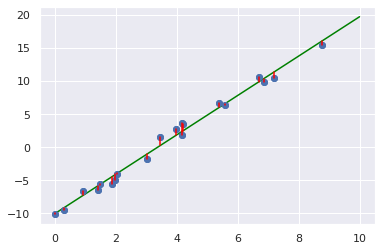

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="green");
plt.plot(x, y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

Para obtener los parametros de la recta, se intenta minimizar la suma de errores cuadrados $\sum_i (y[i] - \hat{y}[i])^2$. Esta es la suma de las longitudes cuadradas de los segmentos de la línea roja en el gráfico anterior. Los valores estimados $\hat{y}[i]$  se indican con `yfit[i]` en el código anterior.

La pendiente y la intersección de los datos están contenidos en los parámetros de ajuste del modelo, que en `scikit-learn` siempre están marcados con un guión bajo al final.

In [9]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.9759007928292
Model intercept: -10.018640586908093


Los resultados que encontramos son muy buenos. Sin embargo, el estimador de "regresión lineal" es capaz de más cosas. Además de ajustes simples en línea recta, también puede manejar modelos lineales multidimensionales de la forma
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde hay varios valores $x$.

Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones más altas.

La naturaleza multidimensional de tales regresiones las hace más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción construyendo algunos datos de ejemplo, usando el operador de multiplicación de matrices de `numpy`:

In [10]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


En el código anterir, los datos $y$ se construyen a partir de tres valores $x$ aleatorios y la regresión lineal recupera los coeficientes utilizados para construir los datos.

De esta manera, podemos usar el estimador único de "regresión lineal" para ajustar líneas y planos.

## Regresión de función básica

Un truco que puede utilizar para adaptar la regresión lineal a relaciones no lineales es transformar los datos de acuerdo con *funciones de base*.

La idea es tomar nuestro modelo lineal multidimensional:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
y construir $x_1, x_2, x_3$, y así sucesivamente, a partir de nuestra entrada unidimensional $x$.

Es decir, hacemos que $x_n = f_n(x)$, donde $f_n() $ es alguna función que transforma nuestros datos.

Por ejemplo, si $f_n(x) = x^n$, nuestro modelo se convierte en una regresión polinomial:
$$
y = a_0 + a_1 x + a_2 x ^ 2 + a_3 x ^ 3 + \cdots
$$

Esta proyección polinomial es lo suficientemente útil como para estar integrada en `scikit-learn`, utilizando el transformador `PolynomialFeatures`:

In [11]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Aquí vemos como el transformador ha convertido nuestra matriz unidimensional en una matriz tridimensional tomando el exponente de cada valor. Ahora, hagamos un modelo polinomial de quinto grado de esta manera:

In [12]:
from sklearn.pipeline import make_pipeline

poly_model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly_model_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model_5 = make_pipeline(PolynomialFeatures(5), LinearRegression())

Con esta transformación en su lugar, podemos usar el modelo lineal para ajustar relaciones mucho más complicadas entre $x$ y $y$. Por ejemplo, aquí hay una onda sinusoidal con ruido:

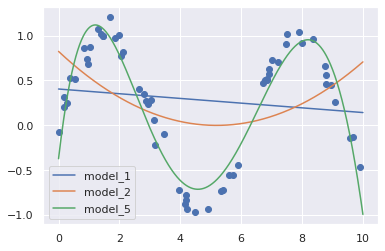

In [19]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(60)
y = np.sin(x) + 0.1 * rng.randn(60)

##1
poly_model_1.fit(x[:, np.newaxis], y)
yfit_1 = poly_model_1.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit_1, label='model_1');

##2
poly_model_2.fit(x[:, np.newaxis], y)
yfit_2 = poly_model_2.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit_2, label='model_2');

##5
poly_model_5.fit(x[:, np.newaxis], y)
yfit_5 = poly_model_5.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit_5, label='model_5');

plt.legend(loc='best')

In [20]:
print('*********1- Coeficientes***************')
print(poly_model_1.steps[1][1].coef_)
print('*********1- Intercepcion ***************')
print(poly_model_1.steps[1][1].intercept_)
print('****************************************')


print('*********2- Coeficientes***************')
print(poly_model_2.steps[1][1].coef_)
print('*********5- Intercepcion ***************')
print(poly_model_2.steps[1][1].intercept_)
print('****************************************')


print('*********5- Coeficientes ***************')
print(poly_model_5.steps[1][1].coef_)
print('*********5- Intercepcion ***************')
print(poly_model_5.steps[1][1].intercept_)
print('****************************************')

*********1- Coeficientes***************
[ 0.         -0.02623255]
*********1- Intercepcion ***************
0.40488707044966143
****************************************
*********2- Coeficientes***************
[ 0.         -0.31769105  0.03059857]
*********5- Intercepcion ***************
0.8241506472771867
****************************************
*********5- Coeficientes ***************
[ 0.00000000e+00  2.90076487e+00 -1.77603804e+00  3.61470476e-01
 -2.84972988e-02  7.14775629e-04]
*********5- Intercepcion ***************
-0.3717476766613868
****************************************


Nuestro modelo lineal, mediante el uso de funciones de base polinomial de quinto orden, puede proporcionar un ajuste excelente a estos datos no lineales.

Referencias: 

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*